In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

output_dir = "./outputb"
regex = r"box(\d+)_temp(\d+\.\d+).txt"

def output_list(path="./hw8"):
    return [f for f in os.listdir(path) if f.endswith('.txt')]

In [14]:
data_ls = output_list(output_dir)

box_np = np.arange(8, 33, 4)
energys = {}

for datapath in data_ls:
    regex = r"box(\d+)\.txt"
    box = int(re.match(regex, datapath).group(1))
    data = np.loadtxt(os.path.join(output_dir, datapath))

    energy = []
    inv = int(np.max(data[:, 0]))
    for i in range(1, inv + 1):
        e_i = data[data[:, 0] == i, 3]
        energy.append(np.mean(e_i) / box / box)
    energy = np.array(energy)
    energys[box] = energy

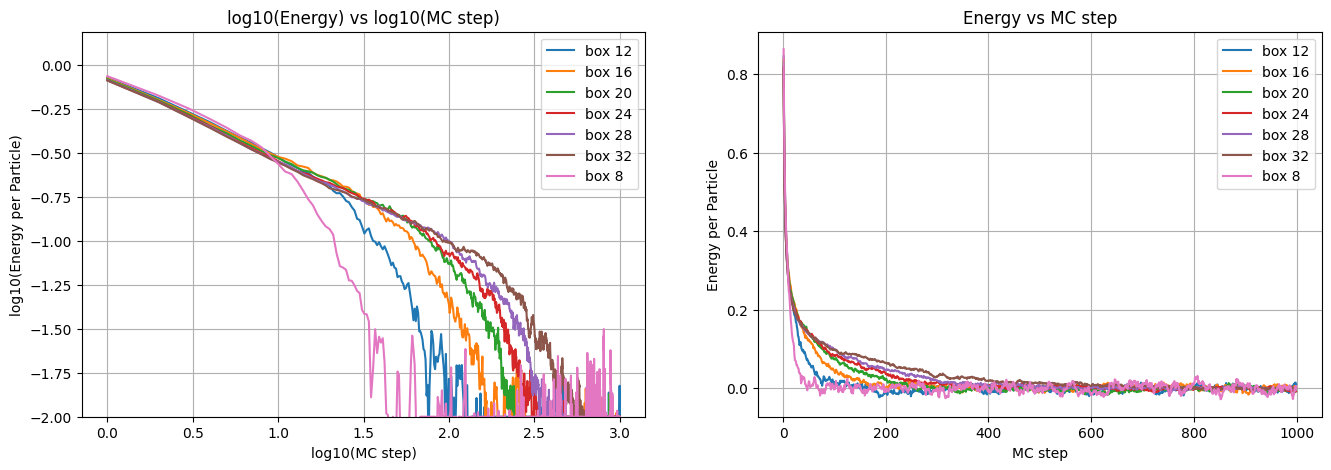

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for box, energy in energys.items():
    x = np.arange(1, len(energy) + 1)
    btm = np.mean(energy[-200:])
    energy1 = energy - btm
    energy1[energy1<0] = 1e-2
    log_e = np.log10(energy1)
    log_x = np.log10(x)
    axes[0].plot(log_x, log_e, label=f"box {box}")
axes[0].set_xlabel("log10(MC step)")
axes[0].set_ylabel("log10(Energy per Particle)")
axes[0].set_ylim(bottom=-2)
axes[0].set_title("log10(Energy) vs log10(MC step)")
axes[0].grid()
axes[0].legend()

for box, energy in energys.items():
    x = np.arange(1, len(energy) + 1)
    btm = np.mean(energy[-200:])
    axes[1].plot(x, energy - btm, label=f"box {box}")
axes[1].set_xlabel("MC step")
axes[1].set_ylabel("Energy per Particle")
axes[1].set_title("Energy vs MC step")
axes[1].grid()
axes[1].legend()

plt.show()

Slope: 1.8430e+00, Intercept: 5.7155e-02
R-squared: 9.7969e-01


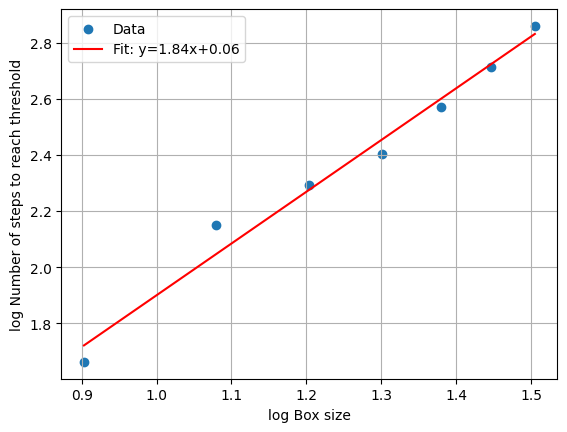

In [34]:
data_dict = {}

E_threshold = 10 ** -3

for box, energy in energys.items():
    btm = np.mean(energy[-200:])
    energy1 = energy - btm
    # find first step where energy is below threshold
    for i, e in enumerate(energy1):
        if e < E_threshold:
            data_dict[box] = i
            break

data_list = []
for box, data in data_dict.items():
    data_list.append((box, data))
data_list.sort(key=lambda x: x[0])

x = np.array([x[0] for x in data_list])
y = np.array([x[1] for x in data_list])
logx = np.log10(x)
logy = np.log10(y)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)
line = slope * logx + intercept
print(f"Slope: {slope:.4e}, Intercept: {intercept:.4e}")
print(f"R-squared: {r_value**2:.4e}")

plt.figure()
plt.scatter(logx, logy, label="Data")
plt.plot(logx, line, label=f"Fit: y={slope:.2f}x+{intercept:.2f}", color="red")
# plt.plot(x, y)
plt.xlabel("log Box size")
plt.ylabel("log Number of steps to reach threshold")
plt.grid()
plt.legend()